

1.   Performed Monte Carlo Simulation on the Apple stock
2.   Data Pulled from yahoo.com for a period of months
3. Found its percent change in the price from the last value
4. Created 100 Simulations




In [2]:
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
style.use('ggplot')

In [17]:
start = dt.datetime(2017, 1, 3)
end = dt.datetime(2017, 11, 20)

In [22]:
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

In [23]:
type(prices)

pandas.core.series.Series

In [24]:
prices

Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
                ...    
2017-11-14    42.834999
2017-11-15    42.270000
2017-11-16    42.775002
2017-11-17    42.537498
2017-11-20    42.494999
Name: Close, Length: 224, dtype: float64

In [25]:
returns = prices.pct_change() # default it is the percentage change between the two consective records 

In [28]:
last_price = prices[-1]
print(last_price)

42.494998931884766


In [29]:
num_simulations = 100
num_days =252 # number of trading days in the year
simulation_df = pd.DataFrame()

In [37]:
for x in range(num_simulations):
  count = 0
  daily_vol =returns.std()
  price_series =[]
  price = last_price*(1+np.random.normal(0,daily_vol))
  price_series.append(price)
  for y in range(num_days):
    if count == 251:
      break
    
    price = price_series[count] * (1+np.random.normal(0,daily_vol))
    price_series.append(price)
    count +=1
  simulation_df[x]= price_series

In [38]:
fig =plt.figure()
fig.suptitle('Monte Carlo Simulation Apple')

Text(0.5, 0.98, 'Monte Carlo Simulation Apple')

<Figure size 432x288 with 0 Axes>

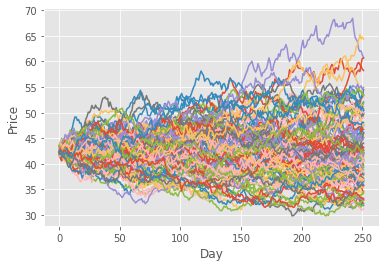

In [40]:
plt.plot(simulation_df)
plt.xlabel('Day')
plt.ylabel("Price")
plt.show()